In [1]:
import numpy as np
import pandas as pd
import pymysql as mysql
import matplotlib.pyplot as plt
import time
import warnings
import seaborn as sns
import pandas as pd


In [8]:
conn=mysql.connect(host='ads507-final-project.mysql.database.azure.com',port=int(3306),user='liam',passwd='airquality',db="air_quality_analysis",ssl={'ssl': {}})


In [9]:
pd.read_sql("SHOW TABLES", conn)

C:\Users\oliwa\AppData\Local\Temp\ipykernel_25264\3779885110.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("SHOW TABLES", conn)


,Tables_in_air_quality_analysis
0,asthma_ed_visits
1,asthma_hospital_visits
2,asthma_pollution
3,co_data
4,hospital_pollution
5,la_co
6,la_pm
7,or_co
8,or_pm
9,pm25_data


In [72]:
# ed_queries = [
#     "DROP TEMPORARY TABLE IF EXISTS socal_co;",
#     "CREATE TEMPORARY TABLE socal_co AS SELECT * FROM la_co UNION ALL SELECT * FROM or_co UNION ALL SELECT * FROM sb_co UNION ALL SELECT * FROM sd_co;",
    
#     "DROP TEMPORARY TABLE IF EXISTS socal_pm;",
#     "CREATE TEMPORARY TABLE socal_pm AS SELECT * FROM la_pm UNION ALL SELECT * FROM or_pm UNION ALL SELECT * FROM sb_pm UNION ALL SELECT * FROM sd_pm;",
    
#     "DROP TEMPORARY TABLE IF EXISTS avg_socal_co;",
#     "CREATE TEMPORARY TABLE avg_socal_co AS SELECT County, AVG(Daily_Max_8hr_CO_Concentration) AS avg_co FROM socal_co GROUP BY County;",
    
#     "DROP TEMPORARY TABLE IF EXISTS avg_socal_pm;",
#     "CREATE TEMPORARY TABLE avg_socal_pm AS SELECT County, AVG(Daily_Mean_PM25_Concentration) AS avg_pm FROM socal_pm GROUP BY County;",
    
#     "DROP TEMPORARY TABLE IF EXISTS asthma_pollution;",
#     "CREATE TABLE asthma_pollution AS SELECT a.*, c.avg_co, p.avg_pm FROM asthma_ed_visits a INNER JOIN avg_socal_co c ON a.county = c.County INNER JOIN avg_socal_pm p ON a.county = p.County;"
# ]

# hospital_queries= [

#     "DROP TEMPORARY TABLE IF EXISTS socal_co;",
#     "CREATE TEMPORARY TABLE socal_co AS SELECT * FROM la_co UNION ALL SELECT * FROM or_co UNION ALL SELECT * FROM sb_co UNION ALL SELECT * FROM sd_co;",
    
#     "DROP TEMPORARY TABLE IF EXISTS socal_pm;",
#     "CREATE TEMPORARY TABLE socal_pm AS SELECT * FROM la_pm UNION ALL SELECT * FROM or_pm UNION ALL SELECT * FROM sb_pm UNION ALL SELECT * FROM sd_pm;",
    
#     "DROP TEMPORARY TABLE IF EXISTS avg_socal_co;",
#     "CREATE TEMPORARY TABLE avg_socal_co AS SELECT County, AVG(Daily_Max_8hr_CO_Concentration) AS avg_co FROM socal_co GROUP BY County;",
    
#     "DROP TEMPORARY TABLE IF EXISTS avg_socal_pm;",
#     "CREATE TEMPORARY TABLE avg_socal_pm AS SELECT County, AVG(Daily_Mean_PM25_Concentration) AS avg_pm FROM socal_pm GROUP BY County;",
    
#     "DROP TEMPORARY TABLE IF EXISTS hospital_pollution;",
#     "CREATE TABLE hospital_pollution AS SELECT a.*, c.avg_co, p.avg_pm FROM asthma_hospital_visits a INNER JOIN avg_socal_co c ON a.county = c.County INNER JOIN avg_socal_pm p ON a.county = p.County;"
    
# ]

# # Execute each query sequentially
# cursor = conn.cursor()
# for query in hospital_queries:
#     cursor.execute(query)
# conn.commit()
  


C:\Users\oliwa\AppData\Local\Temp\ipykernel_18140\254997842.py:44: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  hospital_pollution = pd.read_sql("SELECT * FROM hospital_pollution", conn)


In [45]:
hospital_pollution = pd.read_sql("SELECT * FROM hospital_pollution", conn)
asthma_pollution = pd.read_sql("SELECT * FROM asthma_pollution", conn)

C:\Users\oliwa\AppData\Local\Temp\ipykernel_25264\2608065368.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  hospital_pollution = pd.read_sql("SELECT * FROM hospital_pollution", conn)


C:\Users\oliwa\AppData\Local\Temp\ipykernel_25264\3947706594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_ages['avg_pm']=df_all_ages['avg_pm'].round(1)


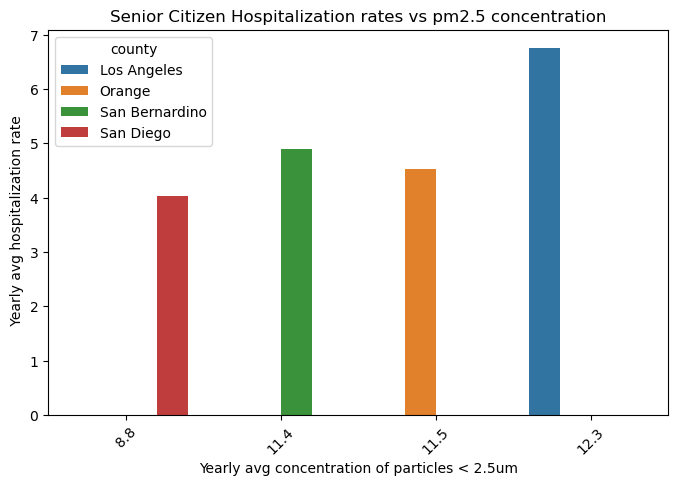

In [51]:
df_all_ages = hospital_pollution[hospital_pollution["age_group"] == "65+ years"]
df_all_ages['avg_pm']=df_all_ages['avg_pm'].round(1)
# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=df_all_ages, x="avg_pm", y="age_adjusted_hospitalization_rate", estimator="mean", errorbar=None,hue="county")

plt.xlabel("Yearly avg concentration of particles < 2.5um")
plt.ylabel(" Yearly avg hospitalization rate")
plt.title("Senior Citizen Hospitalization rates vs pm2.5 concentration")
plt.xticks(rotation=45)
plt.show()